# Text Summarization using SWF

### Dataset : 
Indian News Summary from https://www.kaggle.com/sunnysai12345/news-summary?select=news_summary.csv

The dataset consists of 4515 examples and contains Author_name, Headlines, Url of Article, Short text, Complete Article. I gathered the summarized news from Inshorts and only scraped the news articles from Hindu, Indian times and Guardian. Time period ranges from febrauary to august 2017.

## Import Libraries & Dependencies

In [1]:
%%capture
!pip install spacy rouge
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [2]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
stopwords=list(STOP_WORDS)
from string import punctuation
from heapq import nlargest
from rouge import Rouge
import pandas as pd
punctuation=punctuation+ '\n'
nlp = spacy.load('en_core_web_sm')

## Function Generate Summary

SWF determines the most important word by examining word frequency, and then selects the top three phrases. 

In [3]:
def generate_summary(text):
    doc= nlp(text)
    tokens=[token.text for token in doc]
    word_frequencies={}
    for word in doc:
        if word.text.lower() not in stopwords:
            if word.text.lower() not in punctuation:
                if word.text not in word_frequencies.keys():
                    word_frequencies[word.text] = 1
                else:
                    word_frequencies[word.text] += 1
    max_frequency=max(word_frequencies.values())
    for word in word_frequencies.keys():
        word_frequencies[word]=word_frequencies[word]/max_frequency
    sentence_tokens= [sent for sent in doc.sents]
    sentence_scores = {}
    for sent in sentence_tokens:
        for word in sent:
            if word.text.lower() in word_frequencies.keys():
                if sent not in sentence_scores.keys():                            
                 sentence_scores[sent]=word_frequencies[word.text.lower()]
                else:
                 sentence_scores[sent]+=word_frequencies[word.text.lower()]
    select_length=int(len(sentence_tokens)*0.3)
    summary=nlargest(3, sentence_scores,key=sentence_scores.get)
    final_summary=[word.text for word in summary]
    summary=''.join(final_summary)
    return summary

## Load Dataset

In [4]:
DATA_PATH = "Dataset/news_summary.csv"
data = pd.read_csv(DATA_PATH, encoding = "ISO-8859-1")
data.shape

(4514, 6)

Dataset cleaning

In [5]:
data.dropna(axis=0, inplace=True)
data.shape

(4396, 6)

In [6]:
cleaned_text = []
for txt in data['ctext']:
  cleaned_text.append(txt)

In [7]:
cleaned_summary = []
for t in data['text']:
    cleaned_summary.append(t)

In [8]:
len(cleaned_text[0].split())

364

## Exploratory Data Analysis
Understanding the distribution of text sequence

We want to analyze the length of revieiws and summary to get an idea of the distribution of length of the sequence

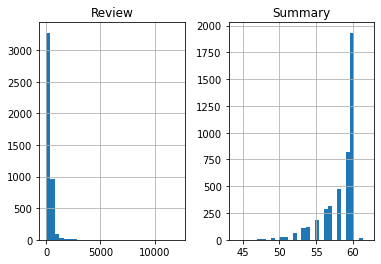

In [9]:
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in cleaned_text:
    text_word_count.append(len(i.split()))

for i in cleaned_summary:
    summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'Review':text_word_count, 'Summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()

## Generate Summary

In [10]:
output_summary = []
for idx, txt in enumerate(cleaned_text):
    print("Text -", idx)
    res = generate_summary(txt)
    output_summary.append(res)

Text - 0
Text - 1
Text - 2
Text - 3
Text - 4
Text - 5
Text - 6
Text - 7
Text - 8
Text - 9
Text - 10
Text - 11
Text - 12
Text - 13
Text - 14
Text - 15
Text - 16
Text - 17
Text - 18
Text - 19
Text - 20
Text - 21
Text - 22
Text - 23
Text - 24
Text - 25
Text - 26
Text - 27
Text - 28
Text - 29
Text - 30
Text - 31
Text - 32
Text - 33
Text - 34
Text - 35
Text - 36
Text - 37
Text - 38
Text - 39
Text - 40
Text - 41
Text - 42
Text - 43
Text - 44
Text - 45
Text - 46
Text - 47
Text - 48
Text - 49
Text - 50
Text - 51
Text - 52
Text - 53
Text - 54
Text - 55
Text - 56
Text - 57
Text - 58
Text - 59
Text - 60
Text - 61
Text - 62
Text - 63
Text - 64
Text - 65
Text - 66
Text - 67
Text - 68
Text - 69
Text - 70
Text - 71
Text - 72
Text - 73
Text - 74
Text - 75
Text - 76
Text - 77
Text - 78
Text - 79
Text - 80
Text - 81
Text - 82
Text - 83
Text - 84
Text - 85
Text - 86
Text - 87
Text - 88
Text - 89
Text - 90
Text - 91
Text - 92
Text - 93
Text - 94
Text - 95
Text - 96
Text - 97
Text - 98
Text - 99
Text - 100

## Examine Result

In [11]:
# Ground Truth
original_summary = cleaned_summary
len(original_summary)

4396

In [12]:
# Output Summary
len(output_summary)

4396

Summary length distribution

In [13]:
for idx, txt in enumerate(output_summary):
    if(len(txt)==0):
        output_summary[idx] = 'Null'

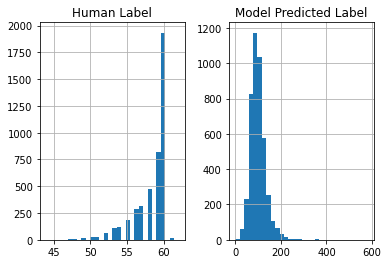

In [14]:
human_label = []
model_predicted_label = []

# populate the lists with sentence lengths
for i in original_summary:
      human_label.append(len(i.split()))

for i in output_summary:
      model_predicted_label.append(len(i.split()))

length_df = pd.DataFrame({'Human Label':human_label, 'Model Predicted Label':model_predicted_label})
length_df.hist(bins = 30)
plt.show()

ROUGE Score

In [15]:
rouge = Rouge()

In [16]:
rouge.get_scores(output_summary, original_summary, avg=True)

{'rouge-1': {'r': 0.4423246117357381,
  'p': 0.3032487209026591,
  'f': 0.35263905667766215},
 'rouge-2': {'r': 0.2015390478415208,
  'p': 0.13032013690126798,
  'f': 0.15415891731883694},
 'rouge-l': {'r': 0.3964582825699411,
  'p': 0.2727782478841618,
  'f': 0.3167078838929418}}

## Output Text

In [17]:
final_result_df = pd.DataFrame()
final_result_df['Human Summary'] = original_summary
final_result_df['Model Predicted Summary'] = output_summary

In [18]:
output_path = "SWF_result.csv"
final_result_df.to_csv(output_path)